# Задание №6
Изучить поведение FDR для эксперимента из лекции.
Рассмотреть случаи, когда количество объектов $m$ варьируется от 200 от 100000.
Калибруемые параметры: $m, \quad m_0, \quad \alpha$.

# Постановка эксперимента

$m$ - количество гипотез, $m_0$ - количество верных гипотез

$\mathbf{X}_i \sim \mathcal{N}(0, 1), \quad i=1,\dots,m_0;$

$\mathbf{X}_i \sim \mathcal{N}(1, 1), \quad i=m_0+1,\dots,m;$

$\mathbf{X}_i \in \mathbb{R}^n.$

**Гипотезы:**

$H^i_0: \mathsf{E}\mathbf{X}_i = 0$;

$H^i_1: \mathsf{E}\mathbf{X}_i \neq 0$.

In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import scipy.stats as st
import seaborn as sns
import pandas as pd
from statsmodels.stats.multitest import multipletests

In [58]:
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['figure.figsize'] = (16.0, 16.0)

Введём функцию $\textit{test}$, которая для полученных значений $\quad m, \quad m_0, \quad \alpha, \quad method \quad$ вычисляет FDR и строит график её зависимости от изменяющегося параметра. Помимо этого графики достигаемых уровней значимости, считает количество ошибок первого($V$) и второго($T$) рода. 

In [50]:
def test(M, M0, ALPHA, method='', change = 'm'):
    j = 0
    plt.subplots_adjust(hspace=0.4)
    FDR = []
    for k in range(len(M)):
        m = M[k]
        m0 = M0[k]
        alpha = ALPHA[k]
        j += 1
        Vs=[]
        Ts=[]
        fdrs= []
        for _ in range(10):
            X = rs.randn(m,n)
            X[m0:]+=1
            p_values = []
            for x in X:
                p_value = st.ttest_1samp(x, 0)[1]
                p_values.append(p_value)

            if method != '':
                res = multipletests(p_values, alpha = alpha, method=method)
                Vs.append(res[0][:m0].sum())
                Ts.append(m-m0 - res[0][m0:].sum())
                fdrs.append(float(Vs[-1]/res[0].sum()))
                p_values = res[1]
        FDR.append(np.mean(fdrs))
        argsorted_p = np.argsort(p_values)
        false = []
        true = []
        for i, id in enumerate(argsorted_p):   
            if id>m0:
                false.append((i, p_values[id]))
            else:
                true.append((i, p_values[id]))
        plt.subplot(4,2,j)
        plt.scatter(*zip(*true), c='b')
        plt.scatter(*zip(*false), c='r')
        plt.plot([], [], ' ', label='FDR = '+ str(np.mean(fdrs))[:6])
        plt.plot([], [], ' ', label='T = '+str(int(np.mean(Ts))))
        plt.plot([], [], ' ', label='V = '+str(int(np.mean(Vs))))
        plt.xlabel('sorted i')
        plt.ylabel('p(i)')
        plt.title('m = '+str(m)+' m0 = '+str(m0))
        _=plt.legend(loc='best')
    
    if change == 'M':
        X = M
    elif change == 'M0':
        X = M0
    else:
        X = ALPHA
    plt.show()
    plt.plot(X, FDR, 'bo-')
    plt.xlabel(change)
    plt.ylabel('FDR')
    plt.title('FDR от ' + change)

Введём функцию $\textit{testM}$, которая не только генерирует несколько выборок для разных изменяющихся параметров, но и
несколько разных псевдослучайных последовательностей ($\textit{RandomState}$ от разных чисел). Затем, усредняя значения по всем
выборкам, строит график зависимости FDR от изменяющегося параметра.

In [86]:
def testM(M, M0, ALPHA, method='', change = 'm'):
    j = 0
    plt.subplots_adjust(hspace=0.4)
    FDR = []
    fdr_rs = []
    for i in range(10):
        rs = np.random.RandomState(35 + i)
        fdr_k = []
        for k in range(len(M)):
            m = M[k]
            m0 = M0[k]
            alpha = ALPHA[k]
            j += 1
            Vs=[]
            Ts=[]
            fdrs= []
            for _ in range(10):
                X = rs.randn(m,n)
                X[m0:]+=1
                p_values = []
                for x in X:
                    p_value = st.ttest_1samp(x, 0)[1]
                    p_values.append(p_value)

                if method != '':
                    res = multipletests(p_values, alpha = alpha, method=method)
                    Vs.append(res[0][:m0].sum())
                    Ts.append(m-m0 - res[0][m0:].sum())
                    fdrs.append(float(Vs[-1]/res[0].sum()))
            fdr_k.append(np.mean(fdrs))
            
        fdr_rs.append(fdr_k)
    
    FDR = np.mean(fdr_rs, axis = 0)
    
    if change == 'M':
        X = M
    elif change == 'M0':
        X = M0
    else:
        X = ALPHA
    plt.show()
    plt.subplot(4,2,7)
    plt.plot(X, FDR, 'bo-')
    plt.xlabel(change)
    plt.ylabel('FDR')
    plt.title('FDR от ' + change)

# 1. Изменение $m$

Запустим $\textit{testM}$ для разных значений $m$.

<Figure size 1152x1152 with 0 Axes>

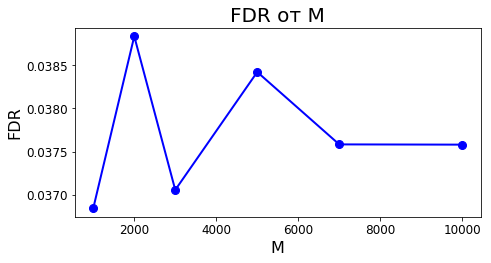

In [87]:
n = 20
M = np.array((1000, 2000, 3000, 5000, 7000, 10000))
M0 = np.array(M*0.75, dtype=int)
alpha = np.ones(6)*0.05
testM(M,M0,alpha, 'fdr_bh', 'M')

С учётом и разных псевдослучайных последовательностей, и нескольких выборок для одного числа $m$, зависимости не наблюдается. Поэтому дальше используем функцию $\textit{test}$.

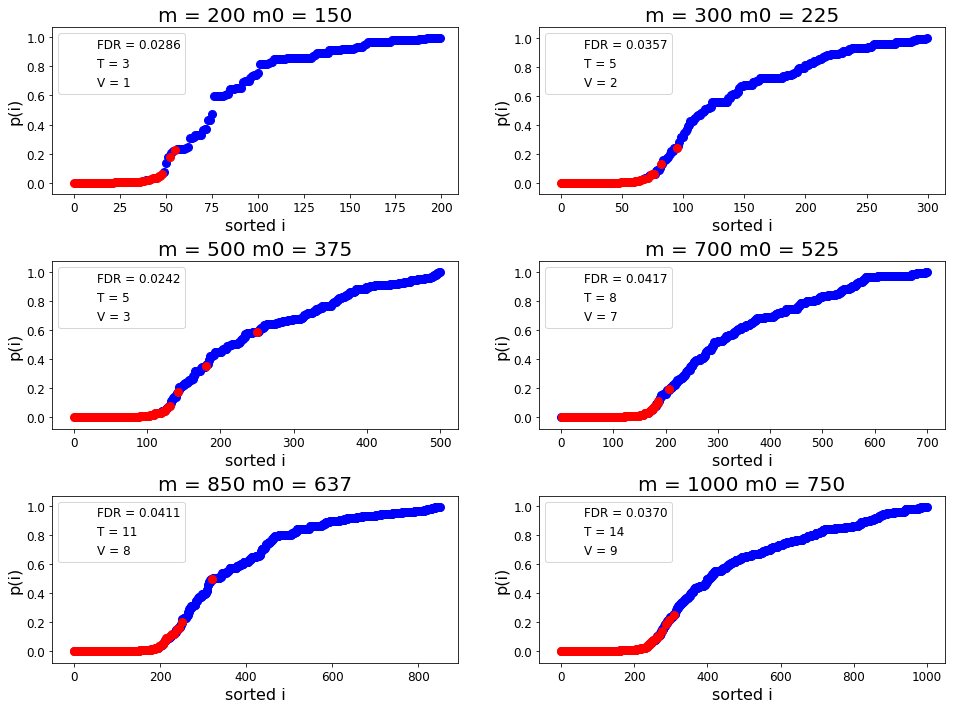

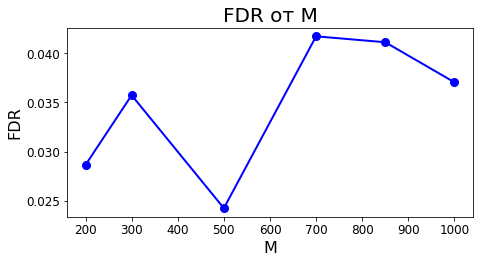

In [93]:
n = 20
M = np.array((200, 300, 500, 700, 850, 1000))
M0 = np.array(M*0.75, dtype=int)
alpha = np.ones(6)*0.05
rs = np.random.RandomState(40)
test(M,M0,alpha, 'fdr_bh', 'M')

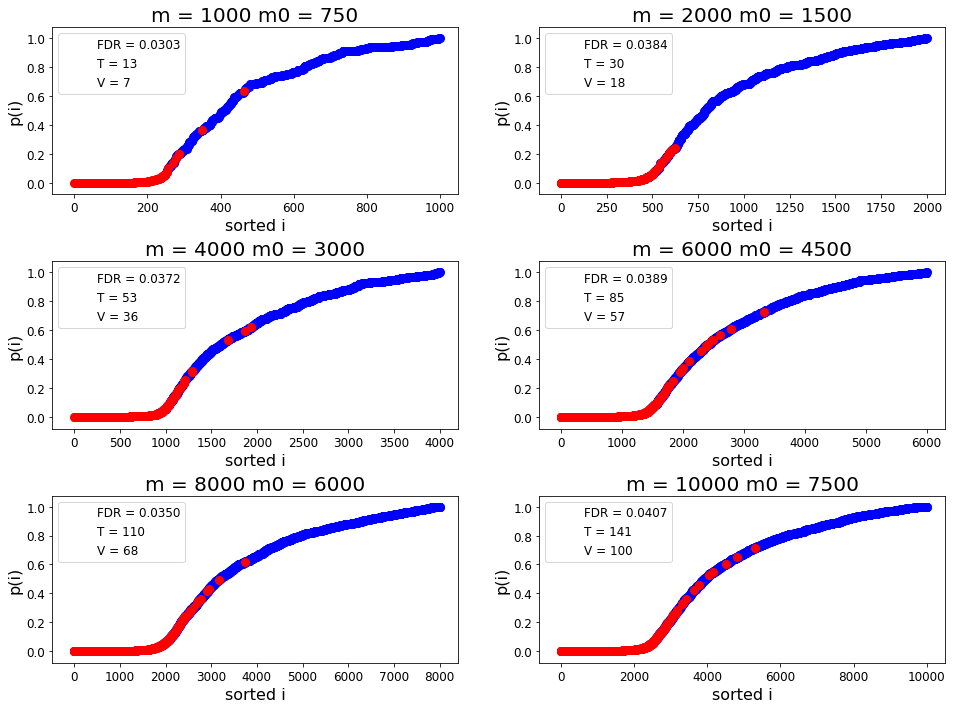

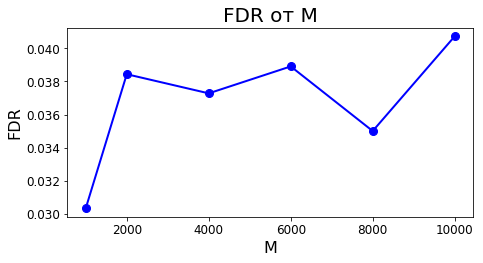

In [92]:
n = 20
M = np.array((1000, 2000, 4000, 6000, 8000, 10000))
M0 = np.array(M*0.75, dtype=int)
alpha = np.ones(6)*0.05
rs = np.random.RandomState(40)
test(M,M0,alpha, 'fdr_bh', 'M')

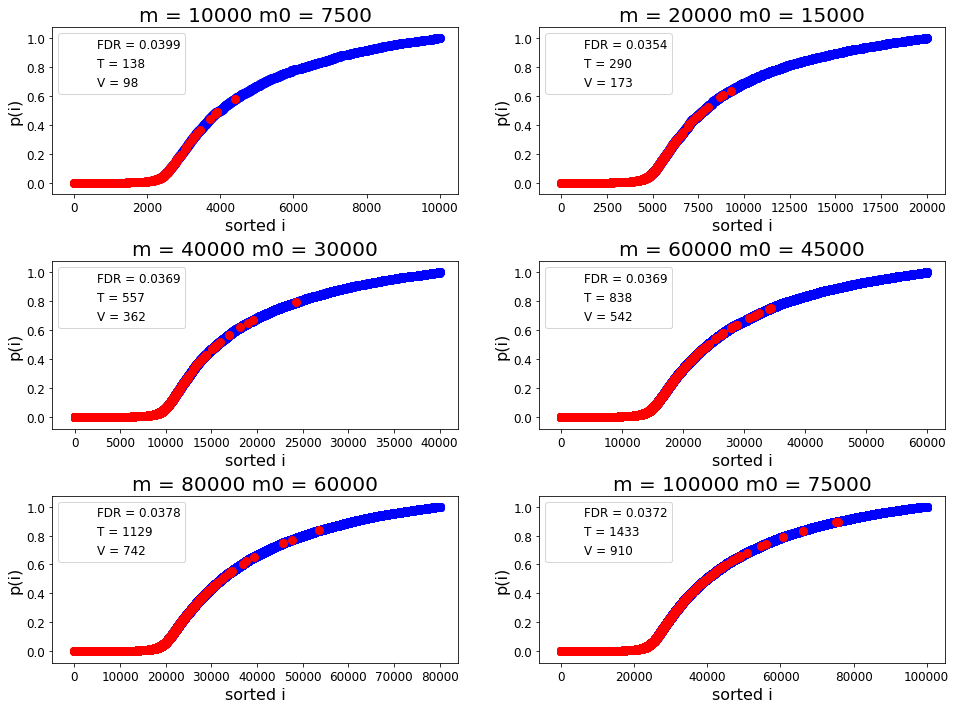

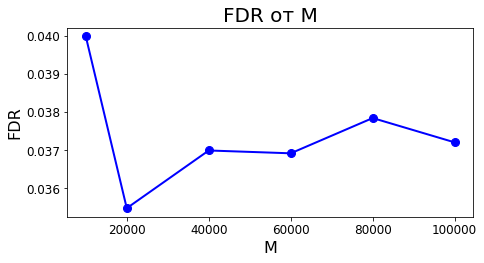

In [90]:
n = 20
M = np.array((10000, 20000, 40000, 60000, 80000, 100000))
M0 = np.array(M*0.75, dtype=int)
alpha = np.ones(6)*0.05
rs = np.random.RandomState(42)
test(M,M0,alpha, 'fdr_bh', 'M')

## Вывод №1:

С ростом общего количества гипотез $m$ ожидаемая доля ложных отклонений гипотез FDR явным образом не зависит от $m$.

# 2. Изменение $m_0$

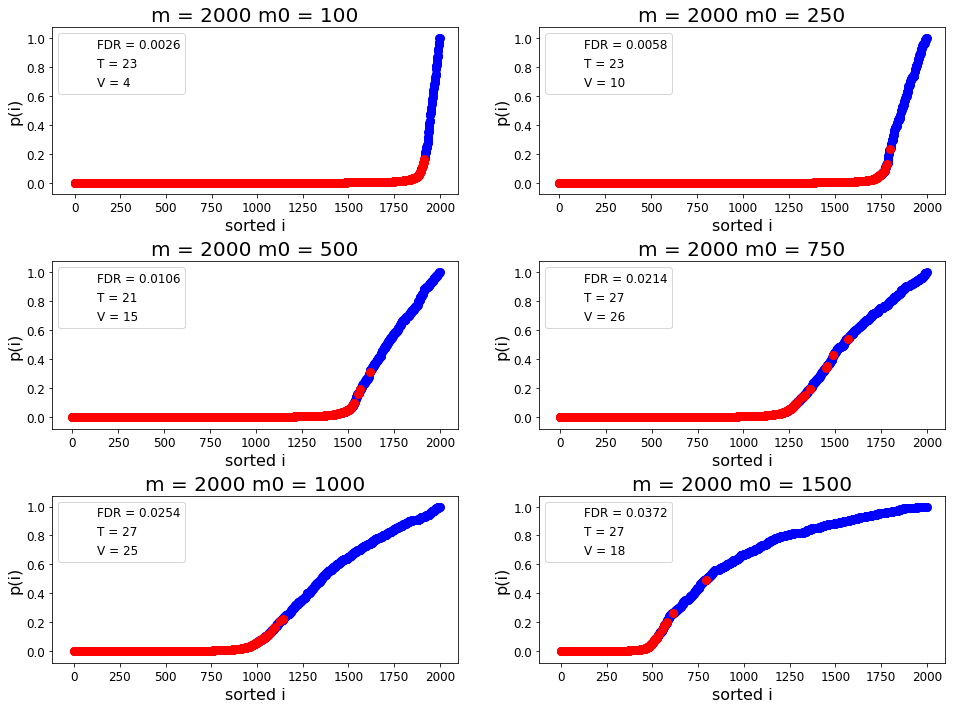

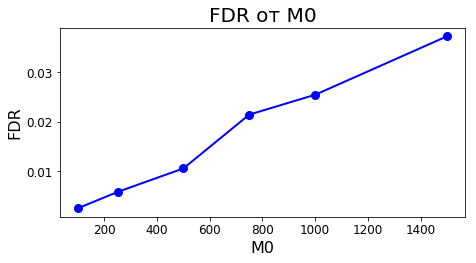

In [73]:
M = np.array((2000, 2000, 2000, 2000, 2000, 2000))
n = 20
M0 = np.array((100, 250, 500, 750, 1000, 1500))
alpha = np.ones(6)*0.05
rs = np.random.RandomState(43)
test(M,M0,alpha,'fdr_bh', 'M0')

## Вывод №2:
Увеличивая долю верных гипотез ($m_0$), FDR растёт почти линейно.

FDR = $\frac{V}{m - m_0 + (V - T)}$, если $R \geq 1$

# 3.  Изменение $\alpha$

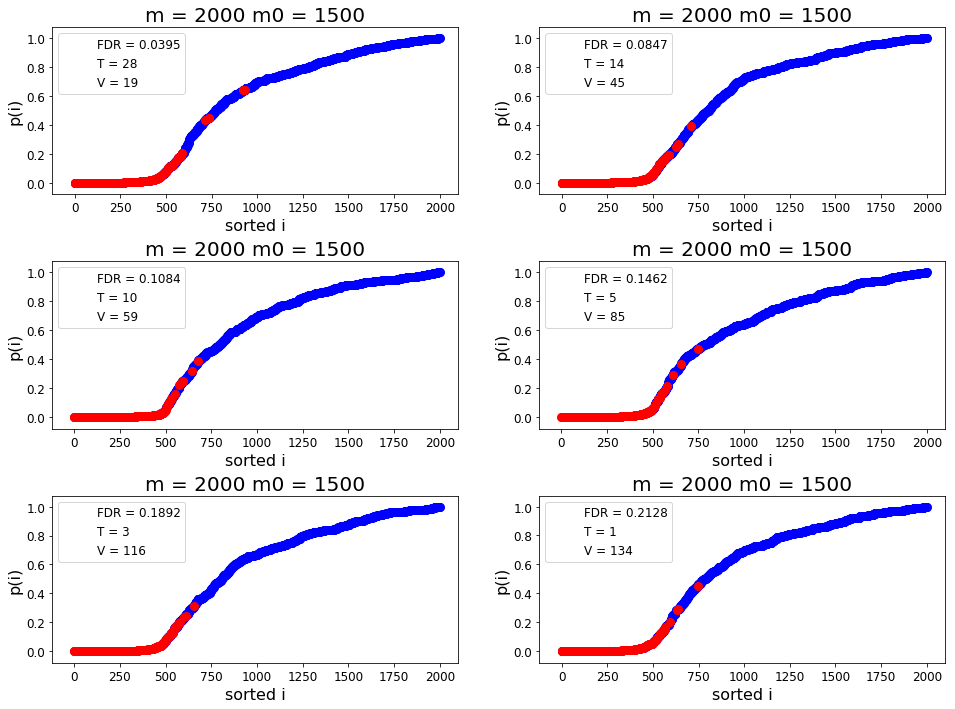

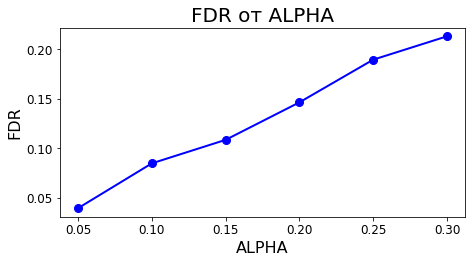

In [64]:
M = np.array((2000, 2000, 2000, 2000, 2000, 2000))
n = 20
M0 = np.array(M*0.75, dtype=int)
alpha = np.array((0.05, 0.1, 0.15, 0.2, 0.25, 0.3))
rs = np.random.RandomState(42)
test(M, M0, alpha, 'fdr_bh', 'ALPHA')

## Вывод №3:
При увеличении параметра $\alpha$ FDR растёт почти линейно.

FDR = $\frac{V}{m - m_0 + (V - T)}$, если $R \geq 1$

Т.к. прирост ошибок первого рода и убыль числа ошибок второго рода - числа на порядок меньше, чем $V$ и $R$ при $\alpha = 0.05$, то FDR растёт.

### Замечание:
В пунктах 2 и 3 оставили функцию $\textit{test}$ для меньших затрат времени. Если использовать функцию $\textit{testM}$, то линейная зависимость FDR от $m_0$ или $\alpha$ более чёткая.